In [1]:
import pandas as pd
df1 = pd.read_excel('Eze passing stats.xlsx')
print (df1)

   Passes  Passes accurate  Long passes  Long passes accurate  Through passes   
0    1171            0.832           76                 0.487              30  \

   Through passes accurate  Crosses  Crosses accurate  Assists   xA   
0                    0.267       54             0.426        9  7.4  \

   Second assists  Passes to final third  Passes to final third accurate   
0               2                    103                           0.602  \

   Passes to penalty area  Passes to penalty area accurate  Received passes   
0                     114                            0.632              874  \

   Forward passes  Forward passes accurate  Back passes  Back passes accurate  
0             269                    0.673          347                 0.942  


Eberechi Eze – Defensive & Ball Recovery Metrics 2024/25

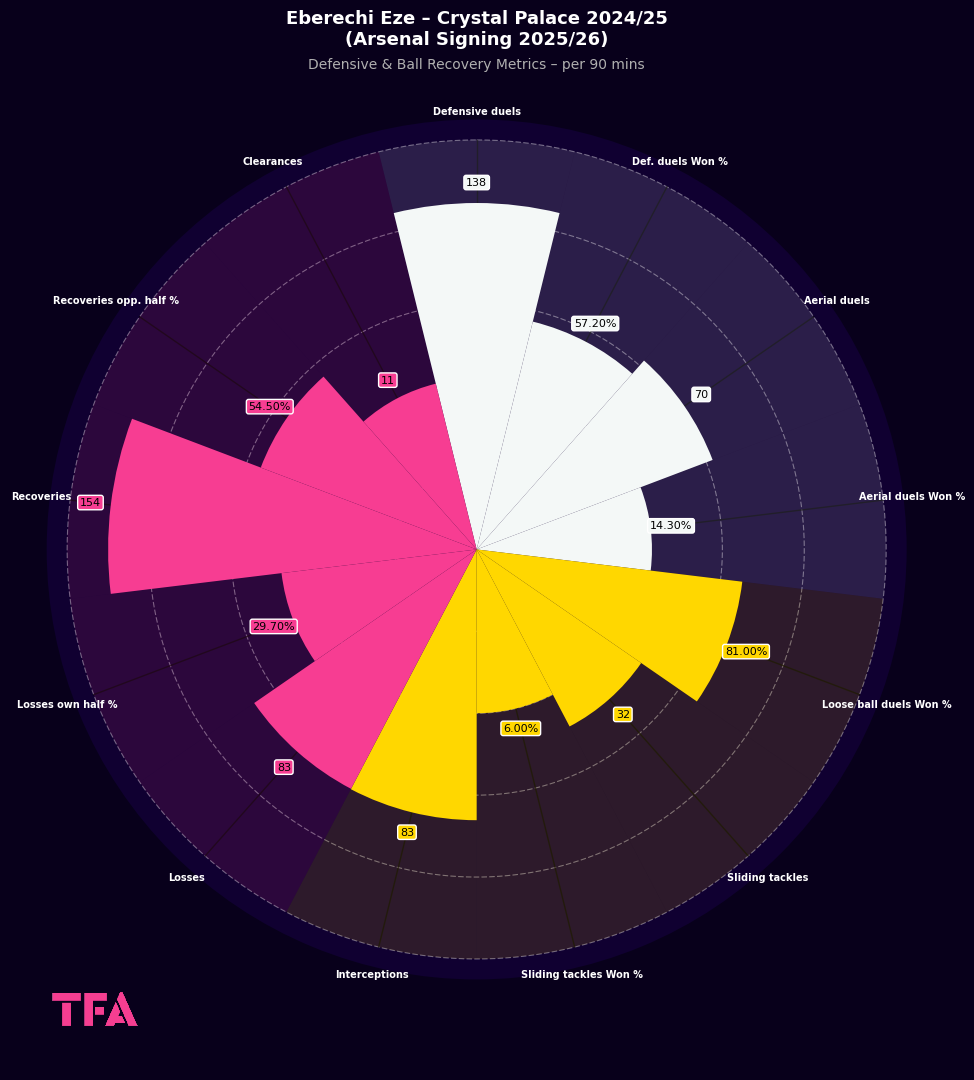

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import os
from PIL import Image
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

data = {
    "Metric": [
        "Defensive duels", "Def. duels Won %", "Aerial duels",
        "Aerial duels Won %", "Loose ball duels Won %",
        "Sliding tackles", "Sliding tackles Won %", "Interceptions",
        "Losses", "Losses own half %", "Recoveries", "Recoveries opp. half %",
        "Clearances"
    ],
    "Value": [
        138, 57.20, 70,
        14.30, 81, 32.10,
        6, 83.30, 83,
        29.70, 154, 54.50,
        11
    ]
}

df = pd.DataFrame(data)

display_values = []
for m, v in zip(df["Metric"], df["Value"]):
    if "%" in m:
        display_values.append(f"{v:.2f}%")
    else:
        display_values.append(f"{v:.0f}")

scaler = MinMaxScaler(feature_range=(0.4, 0.9))
df["Normalized"] = scaler.fit_transform(df[["Value"]])

norm_values = df["Normalized"].tolist()
norm_values += norm_values[:1]
angles = np.linspace(0, 2 * np.pi, len(df), endpoint=False).tolist()
angles += angles[:1]

block_size = len(df) // 3
custom_colors = (
    ["#F4F8F7"] * block_size +
    ["#FFD700"] * block_size +
    ["#F73D92"] * (len(df) - 2 * block_size)
)
colors = custom_colors + [custom_colors[0]]

fig, ax = plt.subplots(figsize=(10, 10), subplot_kw=dict(polar=True))
fig.patch.set_facecolor("#08001B")
ax.set_facecolor("#100031")
ax.set_theta_offset(np.pi / 2)
ax.set_theta_direction(-1)
ax.set_position([0.07, 0.1, 0.86, 0.86])

for r in [0.2, 0.4, 0.6, 0.8, 1.0]:
    ax.plot(np.linspace(0, 2 * np.pi, 500), [r]*500,
            color='white', linewidth=0.8, alpha=0.4, zorder=1,
            linestyle=(0, (5, 2)))

for angle in angles[:-1]:
    ax.plot([angle, angle], [0, 1.0],
            color='black', linewidth=1.0, alpha=0.7, zorder=2)

for i in range(len(df)):
    ax.bar(
        x=angles[i],
        height=1.0,
        width=2 * np.pi / len(df),
        bottom=0,
        color=colors[i],
        edgecolor=colors[i],
        alpha=0.12,
        linewidth=0,
        zorder=2
    )

for i in range(len(df)):
    ax.bar(
        x=angles[i],
        height=norm_values[i],
        width=2 * np.pi / len(df),
        bottom=0,
        color=colors[i],
        edgecolor=colors[i],
        alpha=1,
        linewidth=0,
        zorder=3
    )

for i in range(len(df)):
    ax.text(
        angles[i],
        norm_values[i] + 0.05,
        display_values[i],
        ha='center',
        va='center',
        fontsize=8,
        bbox=dict(boxstyle="round,pad=0.2", facecolor=colors[i], edgecolor='white'),
        color='black',
        zorder=4
    )

for i in range(len(df)):
    angle = angles[i]
    ax.text(
        angle,
        1.07,
        df["Metric"][i],
        ha='center',
        va='center',
        fontsize=7,
        fontweight='bold',
        color='white',
        zorder=4
    )

ax.set_xticks([])
ax.set_yticks([])
ax.spines['polar'].set_visible(False)
ax.grid(False)

plt.suptitle("Eberechi Eze – Crystal Palace 2024/25\n(Arsenal Signing 2025/26)",
             color='white', fontsize=13, weight='bold', y=1.07)

plt.text(0.5, 1.015,
         "Defensive & Ball Recovery Metrics – per 90 mins",
         ha='center', va='center',
         transform=fig.transFigure,
         color='#B0B0B0', fontsize=10)

tfa_logo_path = "D:/Work/Data Analysis TFA/06 How Ancelotti Could Reshape Brazil/logos/TFA.png"
if os.path.exists(tfa_logo_path):
    tfa_img = Image.open(tfa_logo_path)
    imagebox = OffsetImage(tfa_img, zoom=0.2)
    ab = AnnotationBbox(imagebox, (0.15, 0.015), frameon=False, xycoords='figure fraction', box_alignment=(1, 0))
    fig.add_artist(ab)

plt.show()

Eberechi Eze Attacking Metrics 2024/25

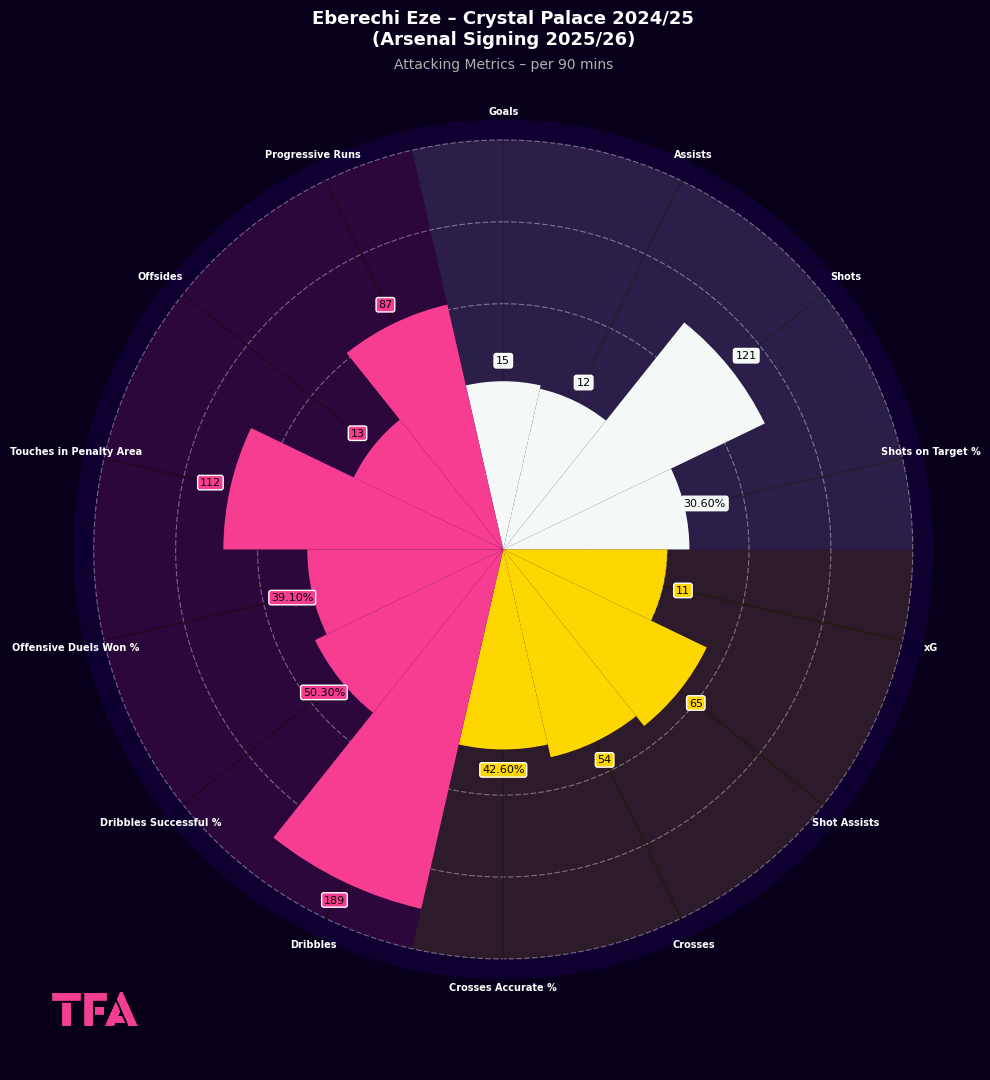

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import os
from PIL import Image
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

data = {
    "Metric": [
        "Goals", "Assists", "Shots", "Shots on Target %",
        "xG", "Shot Assists", "Crosses", "Crosses Accurate %",
        "Dribbles", "Dribbles Successful %",
        "Offensive Duels Won %", "Touches in Penalty Area",
        "Offsides", "Progressive Runs"
    ],
    "Value": [
        15, 12, 121, 30.60, 11.17, 65, 54, 42.60,
        189, 50.30, 39.10, 112, 13, 87
    ]
}

df = pd.DataFrame(data)

display_values = []
for m, v in zip(df["Metric"], df["Value"]):
    if "%" in m:
        display_values.append(f"{v:.2f}%")
    else:
        display_values.append(f"{v:.0f}")

scaler = MinMaxScaler(feature_range=(0.4, 0.9))
df["Normalized"] = scaler.fit_transform(df[["Value"]])

norm_values = df["Normalized"].tolist()
norm_values += norm_values[:1]
angles = np.linspace(0, 2 * np.pi, len(df), endpoint=False).tolist()
angles += angles[:1]

block_size = len(df) // 3
custom_colors = (
    ["#F4F8F7"] * block_size +
    ["#FFD700"] * block_size +
    ["#F73D92"] * (len(df) - 2 * block_size)
)
colors = custom_colors + [custom_colors[0]]

fig, ax = plt.subplots(figsize=(10, 10), subplot_kw=dict(polar=True))
fig.patch.set_facecolor("#08001B")
ax.set_facecolor("#100031")
ax.set_theta_offset(np.pi / 2)
ax.set_theta_direction(-1)
ax.set_position([0.07, 0.1, 0.86, 0.86])

for r in [0.2, 0.4, 0.6, 0.8, 1.0]:
    ax.plot(np.linspace(0, 2 * np.pi, 500), [r]*500,
            color='white', linewidth=0.8, alpha=0.4, zorder=1,
            linestyle=(0, (5, 2)))

for angle in angles[:-1]:
    ax.plot([angle, angle], [0, 1.0],
            color='black', linewidth=1.0, alpha=0.7, zorder=2)

for i in range(len(df)):
    ax.bar(
        x=angles[i],
        height=1.0,
        width=2 * np.pi / len(df),
        bottom=0,
        color=colors[i],
        edgecolor=colors[i],
        alpha=0.12,
        linewidth=0,
        zorder=2
    )

for i in range(len(df)):
    ax.bar(
        x=angles[i],
        height=norm_values[i],
        width=2 * np.pi / len(df),
        bottom=0,
        color=colors[i],
        edgecolor=colors[i],
        alpha=1,
        linewidth=0,
        zorder=3
    )

for i in range(len(df)):
    ax.text(
        angles[i],
        norm_values[i] + 0.05,
        display_values[i],
        ha='center',
        va='center',
        fontsize=8,
        bbox=dict(boxstyle="round,pad=0.2", facecolor=colors[i], edgecolor='white'),
        color='black',
        zorder=4
    )

for i in range(len(df)):
    angle = angles[i]
    ax.text(
        angle,
        1.07,
        df["Metric"][i],
        ha='center',
        va='center',
        fontsize=7,
        fontweight='bold',
        color='white',
        zorder=4
    )

ax.set_xticks([])
ax.set_yticks([])
ax.spines['polar'].set_visible(False)
ax.grid(False)

plt.suptitle("Eberechi Eze – Crystal Palace 2024/25\n(Arsenal Signing 2025/26)",
             color='white', fontsize=13, weight='bold', y=1.07)

plt.text(0.5, 1.015,
         "Attacking Metrics – per 90 mins",
         ha='center', va='center',
         transform=fig.transFigure,
         color='#B0B0B0', fontsize=10)

tfa_logo_path = "D:/Work/Data Analysis TFA/06 How Ancelotti Could Reshape Brazil/logos/TFA.png"
if os.path.exists(tfa_logo_path):
    tfa_img = Image.open(tfa_logo_path)
    imagebox = OffsetImage(tfa_img, zoom=0.2)
    ab = AnnotationBbox(imagebox, (0.15, 0.015), frameon=False, xycoords='figure fraction', box_alignment=(1, 0))
    fig.add_artist(ab)

plt.show()

Eberechi Eze Passing Metrics 2024/25

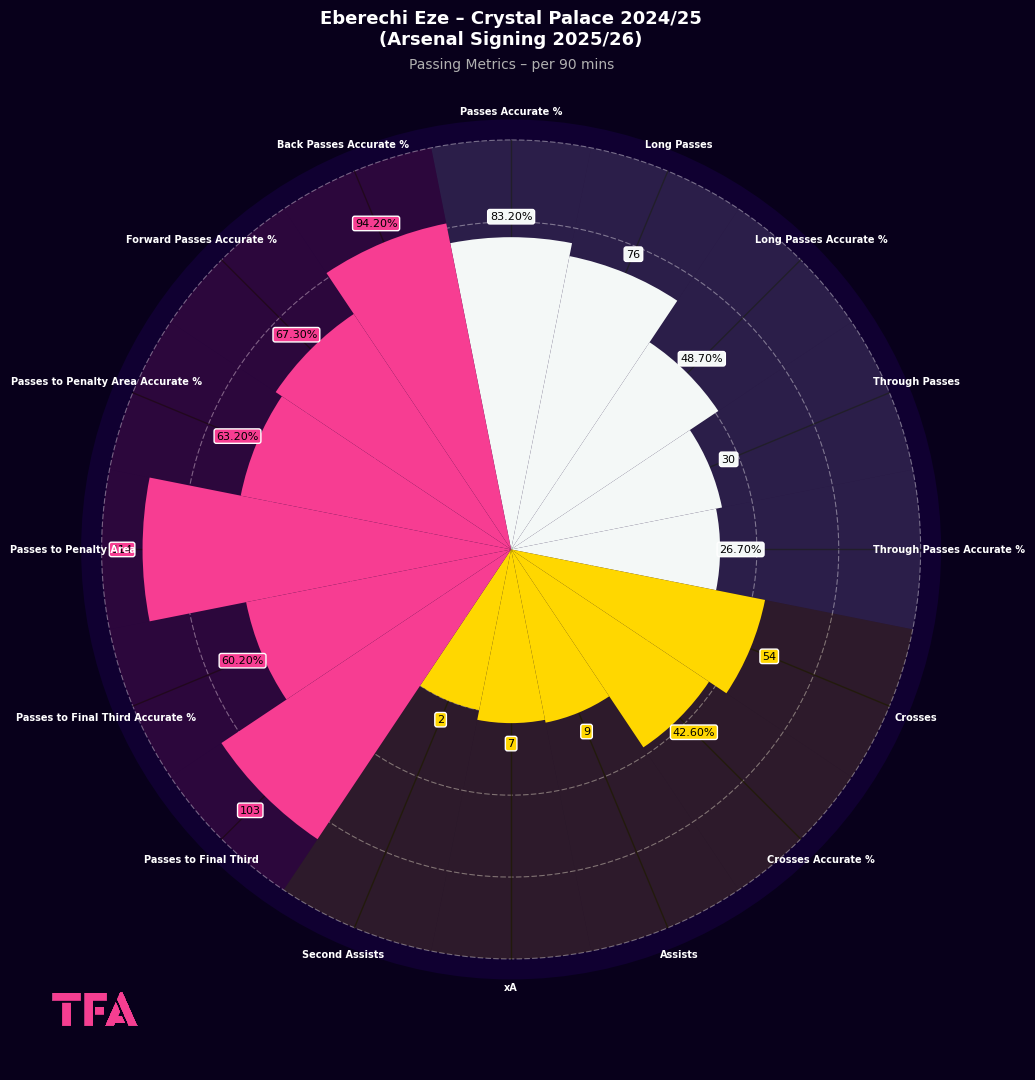

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import os
from PIL import Image
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

data = {
    "Metric": [
        "Passes Accurate %", "Long Passes", "Long Passes Accurate %",
        "Through Passes", "Through Passes Accurate %", "Crosses",
        "Crosses Accurate %", "Assists", "xA", "Second Assists",
        "Passes to Final Third", "Passes to Final Third Accurate %",
        "Passes to Penalty Area", "Passes to Penalty Area Accurate %",
        "Forward Passes Accurate %",
        "Back Passes Accurate %"
    ],
    "Value": [
        83.20, 76, 48.70, 30, 26.70, 54,
        42.60, 9, 7.4, 2,
        103, 60.20, 114, 63.20,
        67.30, 94.20
    ]
}

df = pd.DataFrame(data)

display_values = []
for m, v in zip(df["Metric"], df["Value"]):
    if "%" in m:
        display_values.append(f"{v:.2f}%")
    else:
        display_values.append(f"{v:.0f}")

scaler = MinMaxScaler(feature_range=(0.4, 0.9))
df["Normalized"] = scaler.fit_transform(df[["Value"]])

norm_values = df["Normalized"].tolist()
norm_values += norm_values[:1]
angles = np.linspace(0, 2 * np.pi, len(df), endpoint=False).tolist()
angles += angles[:1]

block_size = len(df) // 3
custom_colors = (
    ["#F4F8F7"] * block_size +
    ["#FFD700"] * block_size +
    ["#F73D92"] * (len(df) - 2 * block_size)
)
colors = custom_colors + [custom_colors[0]]

fig, ax = plt.subplots(figsize=(10, 10), subplot_kw=dict(polar=True))
fig.patch.set_facecolor("#08001B")
ax.set_facecolor("#100031")
ax.set_theta_offset(np.pi / 2)
ax.set_theta_direction(-1)
ax.set_position([0.07, 0.1, 0.86, 0.86])

for r in [0.2, 0.4, 0.6, 0.8, 1.0]:
    ax.plot(np.linspace(0, 2 * np.pi, 500), [r]*500,
            color='white', linewidth=0.8, alpha=0.4, zorder=1,
            linestyle=(0, (5, 2)))

for angle in angles[:-1]:
    ax.plot([angle, angle], [0, 1.0],
            color='black', linewidth=1.0, alpha=0.7, zorder=2)

for i in range(len(df)):
    ax.bar(
        x=angles[i],
        height=1.0,
        width=2 * np.pi / len(df),
        bottom=0,
        color=colors[i],
        edgecolor=colors[i],
        alpha=0.12,
        linewidth=0,
        zorder=2
    )

for i in range(len(df)):
    ax.bar(
        x=angles[i],
        height=norm_values[i],
        width=2 * np.pi / len(df),
        bottom=0,
        color=colors[i],
        edgecolor=colors[i],
        alpha=1,
        linewidth=0,
        zorder=3
    )

for i in range(len(df)):
    ax.text(
        angles[i],
        norm_values[i] + 0.05,
        display_values[i],
        ha='center',
        va='center',
        fontsize=8,
        bbox=dict(boxstyle="round,pad=0.2", facecolor=colors[i], edgecolor='white'),
        color='black',
        zorder=4
    )

for i in range(len(df)):
    angle = angles[i]
    ax.text(
        angle,
        1.07,
        df["Metric"][i],
        ha='center',
        va='center',
        fontsize=7,
        fontweight='bold',
        color='white',
        zorder=4
    )

ax.set_xticks([])
ax.set_yticks([])
ax.spines['polar'].set_visible(False)
ax.grid(False)

plt.suptitle("Eberechi Eze – Crystal Palace 2024/25\n(Arsenal Signing 2025/26)",
             color='white', fontsize=13, weight='bold', y=1.07)

plt.text(0.5, 1.015,
         "Passing Metrics – per 90 mins",
         ha='center', va='center',
         transform=fig.transFigure,
         color='#B0B0B0', fontsize=10)

tfa_logo_path = "D:/Work/Data Analysis TFA/06 How Ancelotti Could Reshape Brazil/logos/TFA.png"
if os.path.exists(tfa_logo_path):
    tfa_img = Image.open(tfa_logo_path)
    imagebox = OffsetImage(tfa_img, zoom=0.2)
    ab = AnnotationBbox(imagebox, (0.15, 0.015), frameon=False, xycoords='figure fraction', box_alignment=(1, 0))
    fig.add_artist(ab)

plt.show()

Eberechi_Eze Goals & Assists Map | Crystal Palace 2024/25

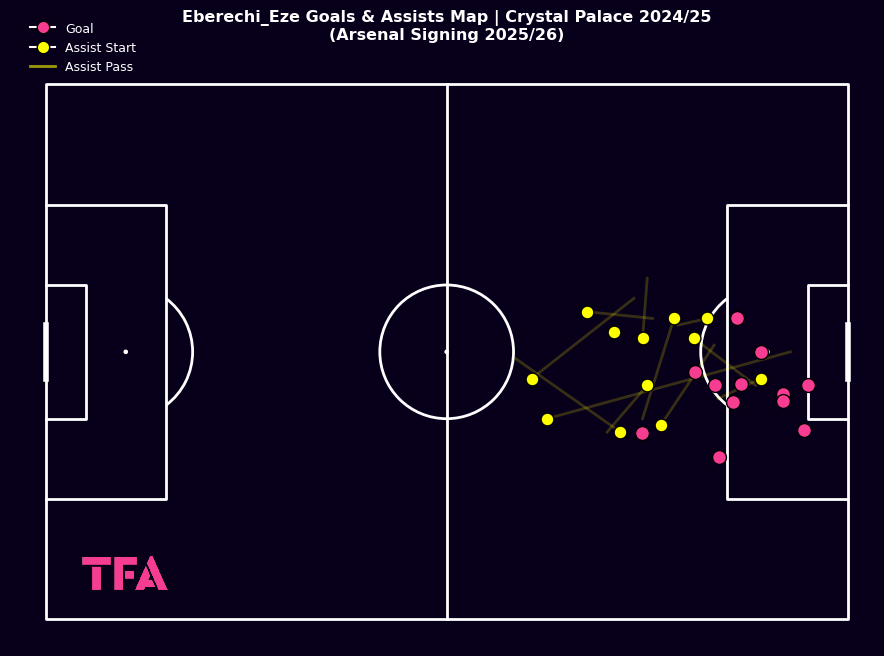

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
from mplsoccer import Pitch
from matplotlib.lines import Line2D
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
from PIL import Image
import os

df = pd.read_excel('Eberechi_Eze_All_Events.xlsx')

pitch = Pitch(pitch_type='statsbomb', pitch_color='#08001B', line_color='white')
fig, ax = pitch.draw(figsize=(10,7))
fig.patch.set_facecolor('#08001B')

goals = df[df['type']=="goal"]
assist_start = df[df['type']=="assist_start"]
assist_receive = df[df['type']=="assist_receive"]

pitch.scatter(goals['x'], goals['y'], ax=ax, s=100, color='#F73D92', edgecolors='black', zorder=3)

pitch.scatter(assist_start['x'], assist_start['y'], ax=ax, s=85, color='yellow', edgecolors='black', zorder=3)

for eid in assist_start['event_id'].unique():
    start = assist_start[assist_start['event_id']==eid]
    receive = assist_receive[assist_receive['event_id']==eid]
    if not start.empty and not receive.empty:
        x = [receive['x'].values[0], start['x'].values[0]]
        y = [receive['y'].values[0], start['y'].values[0]]
        ax.plot(x, y, color='yellow', linewidth=2, alpha=0.19, zorder=2)

plt.suptitle("Eberechi_Eze Goals & Assists Map | Crystal Palace 2024/25\n(Arsenal Signing 2025/26)", 
             color='white', fontsize=11.5, weight='bold', y=0.931)

legend_elements = [
    Line2D([0], [0], marker='o', color='w', label='Goal',
           markerfacecolor='#F73D92', markeredgecolor='black', markersize=9),
    Line2D([0], [0], marker='o', color='w', label='Assist Start',
           markerfacecolor='yellow', markeredgecolor='black', markersize=9),
    Line2D([0], [0], color='yellow', lw=2, alpha=0.6, label='Assist Pass')
]
ax.legend(handles=legend_elements, loc='upper left', fontsize=9, frameon=False,
          labelcolor='white', bbox_to_anchor=(0, 1.08))

plt.tight_layout()

tfa_logo_path = "D:/Work/Data Analysis TFA/06 How Ancelotti Could Reshape Brazil/logos/TFA.png"
if os.path.exists(tfa_logo_path):
    tfa_img = Image.open(tfa_logo_path)
    imagebox = OffsetImage(tfa_img, zoom=0.2)
    ab = AnnotationBbox(imagebox, (0.18, 0.039), frameon=False, 
                        xycoords='figure fraction', box_alignment=(1, 0))
    fig.add_artist(ab)

plt.show()

Eberechi Eze Ball Carry Outcomes 2024/25

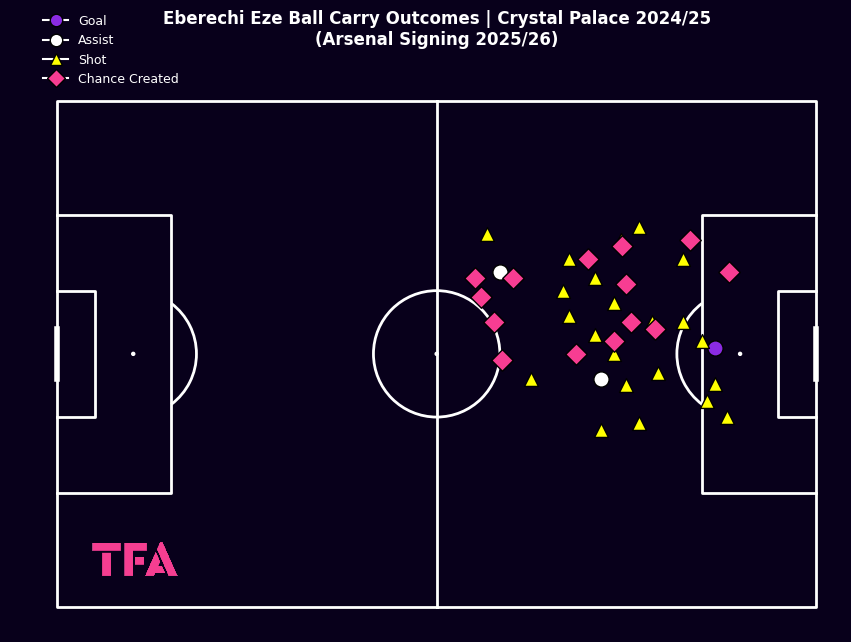

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
from mplsoccer import Pitch
from matplotlib.lines import Line2D
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
from PIL import Image
import os

df = pd.read_excel('Eberechi_Eze_ball_carriers.xlsx')

pitch = Pitch(pitch_type='statsbomb', pitch_color='#08001B', line_color='white')
fig, ax = pitch.draw(figsize=(10,7))
fig.patch.set_facecolor('#08001B')

goals = df[df['type']=="goal"]
assists = df[df['type']=="assist"]
shots = df[df['type']=="shot"]
chances = df[df['type']=="chance created"]

pitch.scatter(goals['x'], goals['y'], ax=ax, s=120, color='#8A2BE2', edgecolors='black', zorder=3, marker='o')
pitch.scatter(assists['x'], assists['y'], ax=ax, s=120, color='white', edgecolors='black', zorder=3, marker='o')
pitch.scatter(shots['x'], shots['y'], ax=ax, s=100, color='yellow', edgecolors='black', zorder=3, marker='^')
pitch.scatter(chances['x'], chances['y'], ax=ax, s=120, color='#F73D92', edgecolors='black', zorder=3, marker='D')

plt.suptitle("Eberechi Eze Ball Carry Outcomes | Crystal Palace 2024/25\n(Arsenal Signing 2025/26)",
            color='white', fontsize=12, weight='bold', y=0.91)

legend_elements = [
    Line2D([0], [0], marker='o', color='w', label='Goal', markerfacecolor='#8A2BE2', markeredgecolor='black', markersize=9),
    Line2D([0], [0], marker='o', color='w', label='Assist', markerfacecolor='white', markeredgecolor='black', markersize=9),
    Line2D([0], [0], marker='^', color='w', label='Shot', markerfacecolor='yellow', markeredgecolor='black', markersize=9),
    Line2D([0], [0], marker='D', color='w', label='Chance Created', markerfacecolor='#F73D92', markeredgecolor='black', markersize=9)
]
ax.legend(handles=legend_elements, loc='upper left', fontsize=9, frameon=False, labelcolor='white', bbox_to_anchor=(0, 1.13))

plt.tight_layout()

tfa_logo_path = "D:/Work/Data Analysis TFA/06 How Ancelotti Could Reshape Brazil/logos/TFA.png"
if os.path.exists(tfa_logo_path):
    tfa_img = Image.open(tfa_logo_path)
    imagebox = OffsetImage(tfa_img, zoom=0.2)
    ab = AnnotationBbox(imagebox, (0.19, 0.039), frameon=False, xycoords='figure fraction', box_alignment=(1, 0))
    fig.add_artist(ab)

plt.show()